In [34]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [35]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test"

In [36]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Shape:  (458, 800, 3)
Label:  day


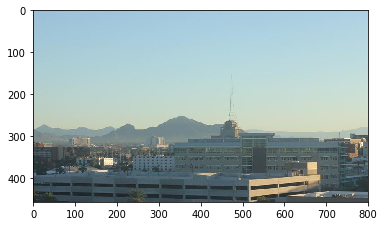

In [37]:
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

plt.imshow(selected_image)
print("Shape: ", selected_image.shape)
print("Label: ", selected_label)

In [38]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600), interpolation=cv2.INTER_AREA)
    
    return standard_im

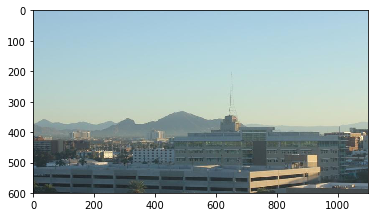

In [39]:
standardized_image = standardize_input(selected_image)
plt.imshow(standardized_image)

### TODO: Standardize the output

With each loaded image, you also need to specify the expected output. For this, use binary numerical values 0/1 = night/day.

In [40]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    ## TODO: complete the code to produce a numerical label
    if label == "day":
        numerical_val = 1
    elif label == "night":
        numerical_val = 0
    
    return numerical_val

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!

In [41]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []
    
    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # standardize the image
        standardized_im = standardize_input(image)
        
        # create a numerical label
        binary_label = encode(label)
        
        # append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: 


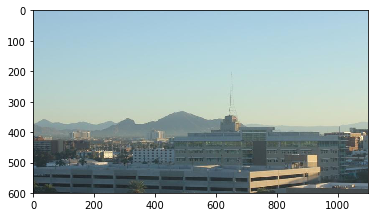

In [43]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: ")

# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


## RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

Label: 1


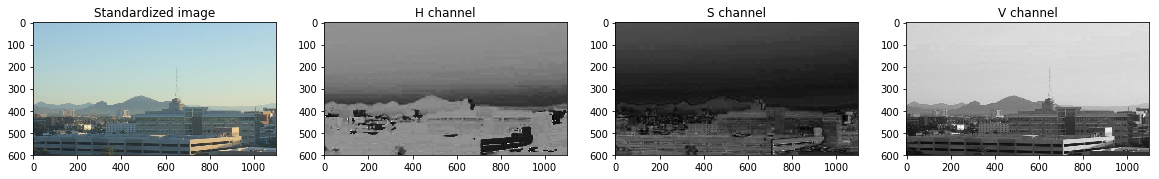

In [45]:
# Convert an image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# COnvert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print("Label: " + str(test_label))

# HSV channels
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.set_title('Standardized image')
ax1.imshow(test_im)

ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')

ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')

ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

---
###  Find the average brightness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [47]:
# FInd the average value or brightness of an image
def avg_brightness(rgb_image):
    # COnvert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:, :, 2])
    
    avg = sum_brightness/(600*1100)
    
    return avg

Avg brightness: 110.170081818


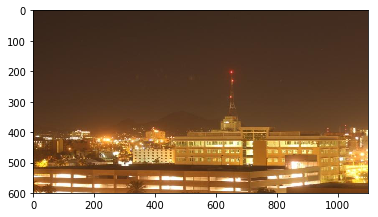

In [92]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 165
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

---
### TODO: Build a complete classifier 

Set a threshold that you think will separate the day and night images by average brightness.

In [93]:
# This function shoud take in RGB image input
def estimate_label(rgb_image):
    
    # Get the average brightness
    average_brightness = avg_brightness(rgb_image)
    
    predicted_label = 0
    threshold = 105
    
    if average_brightness > threshold:
        predicted_label = 1
    else:
        predicted_label = 0
    
    return predicted_label

Predicted Label: 0
Actual Label: 0


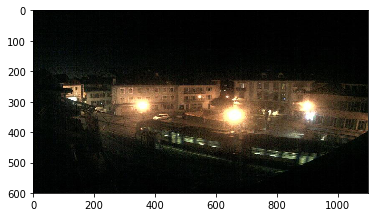

In [97]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

predicted_label = estimate_label(test_im)
print('Predicted Label: ' + str(predicted_label))
print('Actual Label: ' + str(test_label))
plt.imshow(test_im)

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [99]:
import random

# Using the load_dataset function in helpers.py
# load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# SHuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [100]:
# Constructs a list of misclassified images
def get_misclassified_images(test_images):
    misclassified_images_labels = []
    
    for image in test_images:
        im = image[0]
        true_label = image[1]
        
        predicted_label = estimate_label(im)
        
        # compare true and predicted labels
        if predicted_label != true_label:
            misclassified_images_labels.append((im, predicted_label, true_label))
    return misclassified_images_labels

In [101]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct / total

print('Accuracy: ' + str(accuracy))
print('Number of misclassified images = ' + str(len(MISCLASSIFIED)) + " out of " + str(total))

Accuracy: 0.9125
Number of misclassified images = 14 out of 160


---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

1


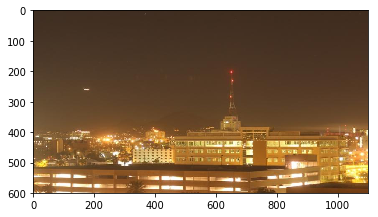

In [103]:
# Visualize misclassified examples
num = 0
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))

# 5. Improve your algorithm!

* (Optional) Tweak your threshold so that accuracy is better.
* (Optional) Add another feature that tackles a weakness you identified!
---